In [1]:
#Import
import pandas as pd
import numpy as np
import operator


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
                       
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/DONNEES_BRUTES/'

df_jeu1_toulouse = pd.read_csv(path_jeu + 'DATA_FRAUDE_TOULOUSE.csv')
#df_jeu1_languedoc = pd.read_csv(path_jeu + 'DATA_FRAUDE_LANGUEDOC.csv')

In [3]:
df_jeu1_toulouse.head()

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,1.0,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,1.0,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,1.0,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs


In [10]:
df_jeu1_toulouse.columns.tolist()

['ID',
 'TOP_FRAUDE',
 'TOP_FRAUDE_CARTE',
 'TOP_FRAUDE_VIREMENT',
 'Date_debut_fraude',
 'cp_ou_pays',
 'SECTEUR_GESTION',
 'INDICMAIL',
 'INDICTEL',
 'INDICPOR',
 'INDICSMS',
 'INDICMAILING',
 'TOP_E_RELEVE',
 'MESSAGERIE_WEB_ACTIVE',
 'FIAB_TEL_DOMICILE',
 'FIAB_TEL_TRAVAIL',
 'FIAB_TEL_PORTABLE',
 'FIAB_EMAIL',
 'REFUS_SEA',
 'NBJ_CNT_AGENCE_DEPOT_6M',
 'NBJ_CNT_AGENCE_VENTE_6M',
 'NBJ_CNT_RDV_AGENCE_6M',
 'NBJ_CNT_AUTOMATE_RETRAIT_6M',
 'NBJ_CNT_AUTOMATES_DEPOT_6M',
 'NBJ_CNT_AGENCE_RETRAIT_6M',
 'NBJ_CNT_AGENCE_6M',
 'NBJ_CNT_SMS_6M',
 'NBJ_CNT_EMAIL_6M',
 'NBJ_CNT_APPELENTRANTS_6M',
 'NBJ_CNT_AUTOMATE_6M',
 'NBJ_CNT_LETTRES_6M',
 'TOT_CNX_WEB_WEEK_6M',
 'TOT_CNX_WEB_END_6M',
 'TOT_CCOMPTE_WEB_6M',
 'TOT_IMPRESSIONRIB_WEB_6M',
 'TOT_TLCHGMTEDOC_WEB_6M',
 'TOT_CCOMPTE_MBANQUE_6M',
 'TOT_CMS_WEB_6M',
 'TOT_CVAD_WEB_6M',
 'TOT_VEL_WEB_6M',
 'TOT_ATT_SIGN_VAD_WEB_6M',
 'TOT_CHABITAT_WEB_6M',
 'TOT_MODIF_PARAM_CARTE_WEB_6M',
 'TOT_CNX_INVSTORE_WEB_6M',
 'NB_JR_WEB_6M',
 'NB_CNXS_WEB_6

In [5]:
df_jeu1_toulouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265293 entries, 0 to 265292
Columns: 287 entries, ID to profil
dtypes: float64(254), int64(3), object(30)
memory usage: 580.9+ MB


In [6]:
!pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(df_jeu1_toulouse, pairwise_analysis='off')
my_report.show_html("MyReport.html")

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


                                             |          | [  0%]   00:00 -> (? left)

Report MyReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
df_quanti = df_jeu1_toulouse.drop (['seg_nature_potentiel', 'type_residence_1', 'type_residence_2', 'situ_fam_1', 'situ_fam_2', 'contrat_travail_1', 'contrat_travail_2', 'Tranche_age_1', 'Tranche_age_2', 'sexe_1', 'sexe_2', 'Tranche_age_moyen', 'situ_globale', 'SGMT_FIDELITE', 'Fidelite_calcule', 'profil', 'INDICMAILING', 'INDICSMS', 'INDICPOR', 'INDICTEL', 'INDICMAIL', 'SECTEUR_GESTION', 'cp_ou_pays', 'Date_debut_fraude', 'DUREE_CNX_WEB_TOT_6M', 'DUREE_CNX_MOY_WEB_6M'],axis = 1)
df_quanti

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,60.0,42.0,0.0,0.0,15.0,0.0,1.0
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,41.0,13.0,0.0,0.0,9.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265288,831zRA1wuw9mbt/KTbham8O9Q==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265289,831LW2dWsvzMnLio+4MuJuqZQ==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
265290,831ZMCaimlzSFHKxaKJEDPefQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,23.0,0.0,0.0,0.0,0.0,1.0
265291,831FiYDYlJm0Y/Y+b1+3gQasw==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0


In [16]:
df3 = df_quanti[df_quanti.columns[df_quanti.isna().sum()/df_quanti.shape[0]<0.50]]
df3

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,60.0,42.0,0.0,0.0,15.0,0.0,1.0
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,41.0,13.0,0.0,0.0,9.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265288,831zRA1wuw9mbt/KTbham8O9Q==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265289,831LW2dWsvzMnLio+4MuJuqZQ==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
265290,831ZMCaimlzSFHKxaKJEDPefQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,23.0,0.0,0.0,0.0,0.0,1.0
265291,831FiYDYlJm0Y/Y+b1+3gQasw==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0


In [17]:
for i in df3.columns:
    df3[i].fillna(df3[i].mode()[0],inplace = True)
df3

C:\Python\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,60.0,42.0,0.0,0.0,15.0,0.0,1.0
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,41.0,13.0,0.0,0.0,9.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265288,831zRA1wuw9mbt/KTbham8O9Q==,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265289,831LW2dWsvzMnLio+4MuJuqZQ==,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0
265290,831ZMCaimlzSFHKxaKJEDPefQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,6.0,23.0,0.0,0.0,0.0,0.0,1.0
265291,831FiYDYlJm0Y/Y+b1+3gQasw==,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0


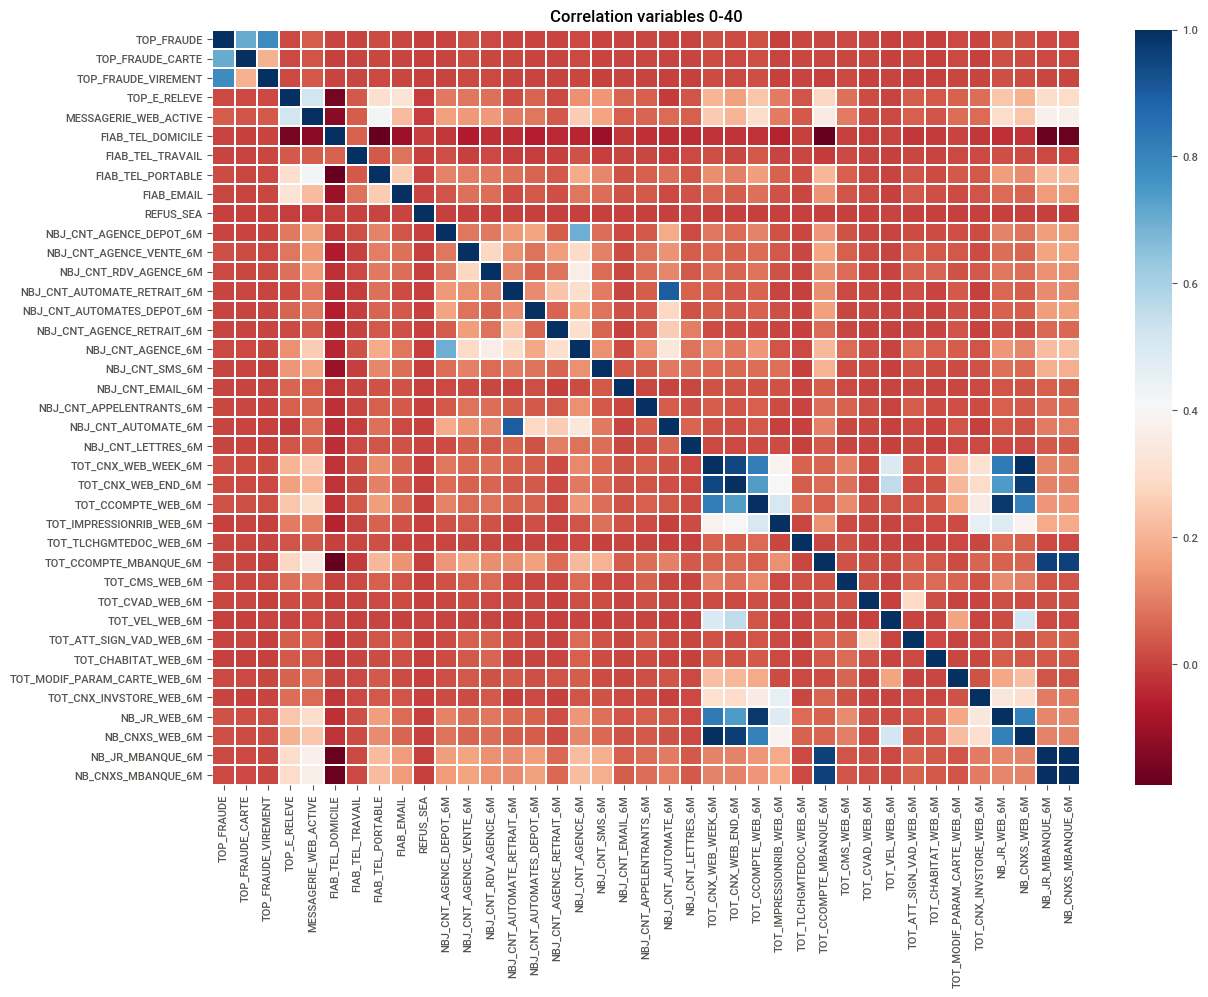

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,TOT_CVAD_WEB_6M,TOT_VEL_WEB_6M,TOT_ATT_SIGN_VAD_WEB_6M,TOT_CHABITAT_WEB_6M,TOT_MODIF_PARAM_CARTE_WEB_6M,TOT_CNX_INVSTORE_WEB_6M,NB_JR_WEB_6M,NB_CNXS_WEB_6M,NB_JR_MBANQUE_6M,NB_CNXS_MBANQUE_6M
TOP_FRAUDE,1.000000,0.705099,0.780979,0.014182,0.045335,0.002197,0.004823,0.014646,0.008003,-0.000365,...,0.006133,0.000366,0.004472,-0.000192,0.011280,0.000950,0.026859,0.020520,0.011343,0.011317
TOP_FRAUDE_CARTE,0.705099,1.000000,0.195025,0.010044,0.030465,-0.002258,0.003017,0.009725,0.003829,-0.000258,...,0.009442,-0.000344,0.005847,-0.000129,0.011646,0.000044,0.020478,0.015752,0.011482,0.011465
TOP_FRAUDE_VIREMENT,0.780979,0.195025,1.000000,0.011226,0.039574,0.004619,0.005601,0.012098,0.006935,-0.000285,...,-0.000823,0.000712,0.000020,-0.000393,0.005441,0.000959,0.020517,0.015389,0.005259,0.005206
TOP_E_RELEVE,0.014182,0.010044,0.011226,1.000000,0.517972,-0.164196,0.041591,0.303757,0.323858,-0.004961,...,0.017411,0.004602,0.045845,0.034551,0.055214,0.071212,0.240771,0.194063,0.294689,0.293189
MESSAGERIE_WEB_ACTIVE,0.045335,0.030465,0.039574,0.517972,1.000000,-0.134199,0.043103,0.422560,0.216637,-0.007765,...,0.017385,0.011980,0.049992,0.031051,0.073707,0.068409,0.296333,0.238225,0.372523,0.370843
FIAB_TEL_DOMICILE,0.002197,-0.002258,0.004619,-0.164196,-0.134199,1.000000,0.054932,-0.186906,-0.103829,-0.005696,...,-0.006556,0.000502,-0.018085,-0.013090,0.003457,-0.015710,-0.027641,-0.024947,-0.182224,-0.182017
FIAB_TEL_TRAVAIL,0.004823,0.003017,0.005601,0.041591,0.043103,0.054932,1.000000,0.041825,0.081937,-0.001544,...,0.000786,0.000012,0.007429,0.004807,0.010120,0.011821,0.021340,0.017676,0.010547,0.010026
FIAB_TEL_PORTABLE,0.014646,0.009725,0.012098,0.303757,0.422560,-0.186906,0.041825,1.000000,0.251688,0.001304,...,0.010598,0.004642,0.030441,0.018645,0.037815,0.037269,0.155005,0.124153,0.218491,0.217504
FIAB_EMAIL,0.008003,0.003829,0.006935,0.323858,0.216637,-0.103829,0.081937,0.251688,1.000000,0.004890,...,0.015345,0.000292,0.037386,0.021632,0.017376,0.029462,0.069791,0.057099,0.153717,0.153223
REFUS_SEA,-0.000365,-0.000258,-0.000285,-0.004961,-0.007765,-0.005696,-0.001544,0.001304,0.004890,1.000000,...,-0.000250,0.000783,-0.000726,-0.000454,-0.000283,-0.000988,-0.003192,-0.002608,-0.004062,-0.004058


In [21]:
df_sel1 = df3.iloc[:,0:40]
df_sel1

f, ax= plt.subplots(figsize = (14, 10))

corr = df_sel1.corr()
# print(corr)
sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)

ax.set_title('Correlation variables 0-40')
plt.show()
corr


                                TOP_FRAUDE  TOP_FRAUDE_CARTE  \
TOP_FRAUDE                        1.000000          0.705099   
TOP_FRAUDE_CARTE                  0.705099          1.000000   
TOP_FRAUDE_VIREMENT               0.780979          0.195025   
NB_CNXS_CABOURSE_6M              -0.001773         -0.001267   
NB_JR_MACARTE_6M                  0.008348          0.008231   
NB_CNXS_MACARTE_6M                0.008162          0.008090   
TOT_VIR_WEB_6M                    0.020848          0.015283   
TOT_VIR_M_6M                      0.005645          0.008514   
ALERTE_SMS_6M                     0.003267          0.002744   
NB_VIR_AGENCE_6M                  0.006122          0.004518   
NB_RETRAIT_MN_6M                  0.003989          0.003995   
NBPAIEMENTS_6M                    0.012688          0.013279   
MNTPAIEMENTS_6M                   0.017693          0.017322   
NBPAIEMENTS_WEB_6M                0.007610          0.009192   
MNTPAIEMENTS_WEB_6M               0.0113

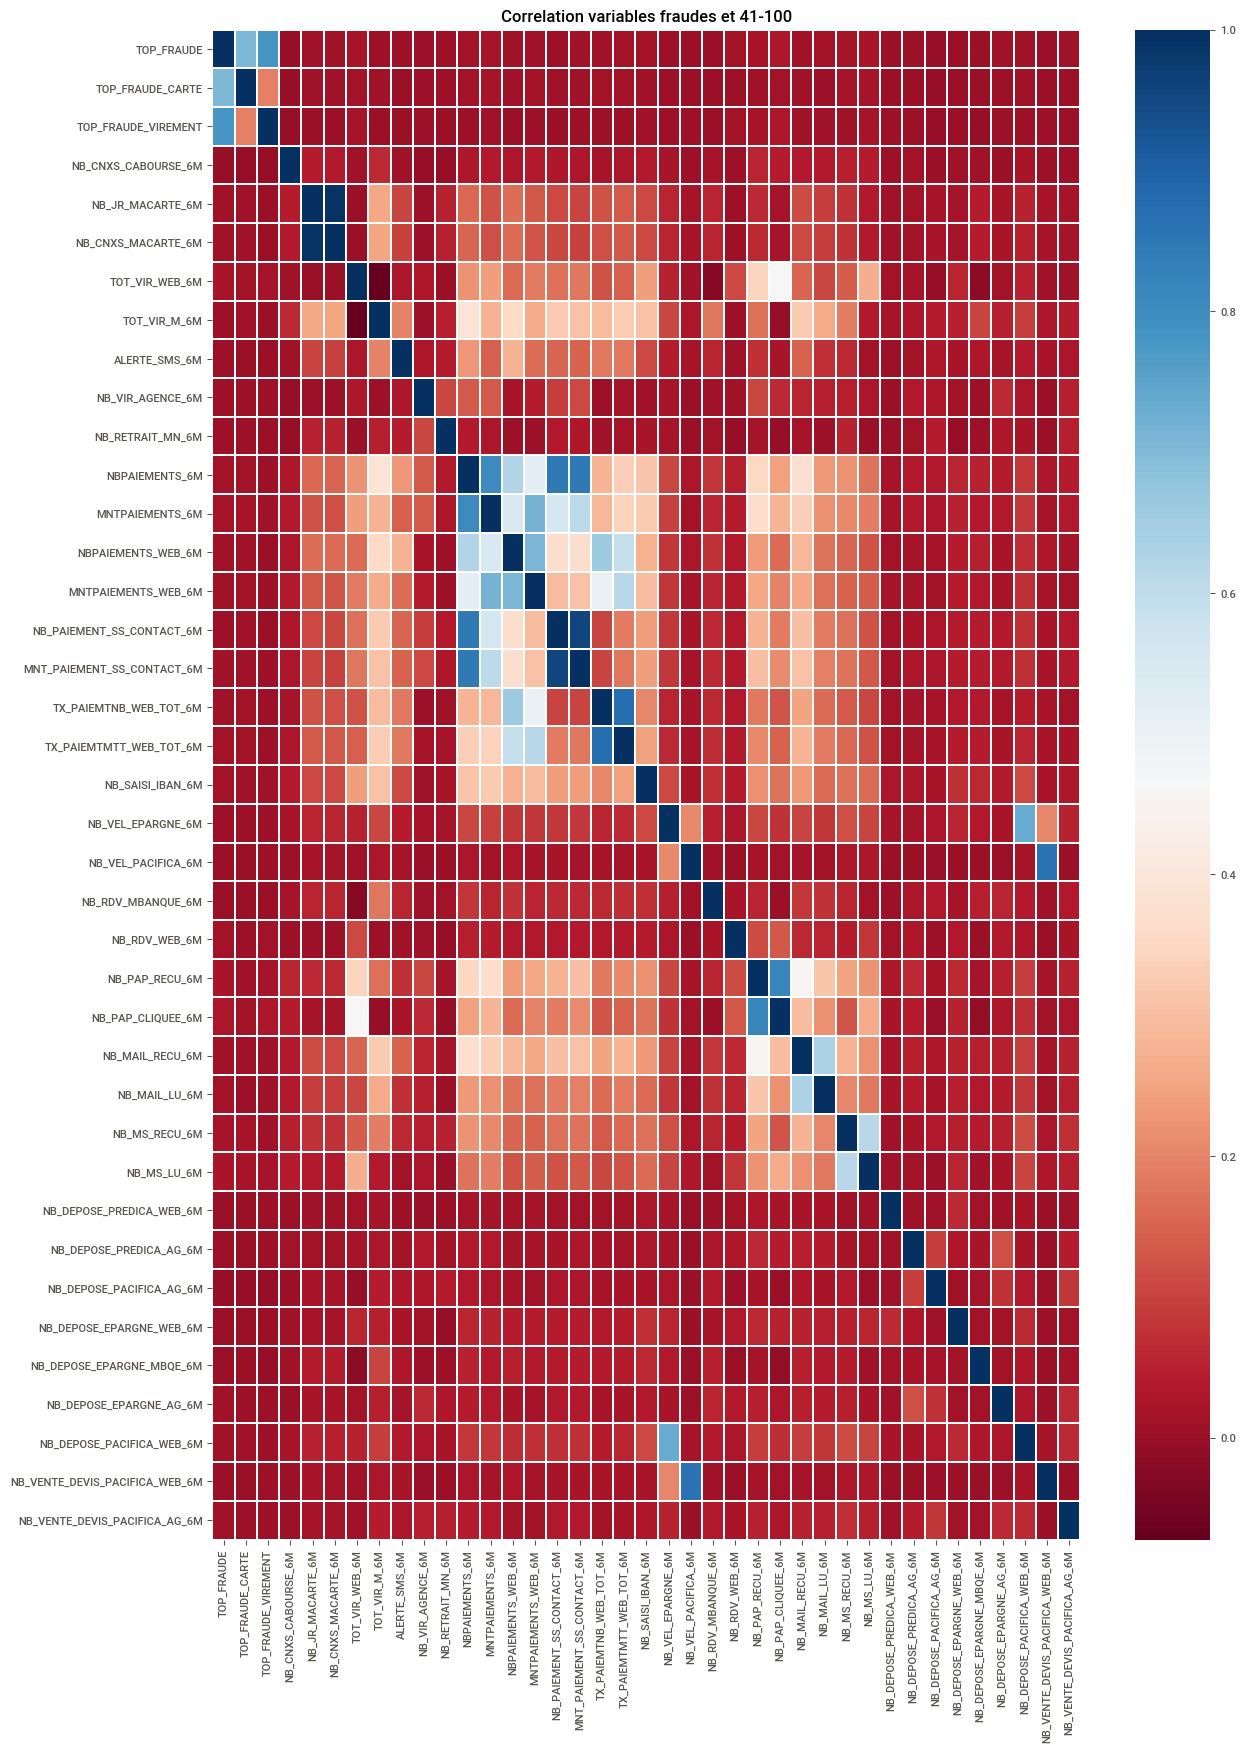

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,NB_CNXS_CABOURSE_6M,NB_JR_MACARTE_6M,NB_CNXS_MACARTE_6M,TOT_VIR_WEB_6M,TOT_VIR_M_6M,ALERTE_SMS_6M,NB_VIR_AGENCE_6M,...,NB_MS_LU_6M,NB_DEPOSE_PREDICA_WEB_6M,NB_DEPOSE_PREDICA_AG_6M,NB_DEPOSE_PACIFICA_AG_6M,NB_DEPOSE_EPARGNE_WEB_6M,NB_DEPOSE_EPARGNE_MBQE_6M,NB_DEPOSE_EPARGNE_AG_6M,NB_DEPOSE_PACIFICA_WEB_6M,NB_VENTE_DEVIS_PACIFICA_WEB_6M,NB_VENTE_DEVIS_PACIFICA_AG_6M
TOP_FRAUDE,1.000000,0.705099,0.780979,-0.001773,0.008348,0.008162,0.020848,0.005645,0.003267,0.006122,...,0.023841,0.002284,0.005432,-0.002657,0.002452,0.000100,0.007744,0.009602,0.001995,0.008217
TOP_FRAUDE_CARTE,0.705099,1.000000,0.195025,-0.001267,0.008231,0.008090,0.015283,0.008514,0.002744,0.004518,...,0.019081,-0.000784,-0.000465,-0.001873,0.002564,0.002068,0.004387,0.010995,-0.000812,0.007048
TOP_FRAUDE_VIREMENT,0.780979,0.195025,1.000000,-0.001374,0.002401,0.002312,0.018615,-0.000389,0.001639,0.004455,...,0.015763,0.003477,0.006941,-0.002075,0.001839,-0.002112,0.005276,0.007172,0.003128,0.003631
NB_CNXS_CABOURSE_6M,-0.001773,-0.001267,-0.001374,1.000000,0.041590,0.040401,0.010739,0.064436,0.007627,-0.001764,...,0.044801,0.005292,0.012506,-0.001044,0.009729,0.011323,0.000801,0.020067,0.003361,0.003227
NB_JR_MACARTE_6M,0.008348,0.008231,0.002401,0.041590,1.000000,0.994838,0.000844,0.256957,0.101424,0.006034,...,0.038960,0.010990,0.013503,0.023345,0.017264,0.043344,0.023216,0.049156,0.019970,0.017651
NB_CNXS_MACARTE_6M,0.008162,0.008090,0.002312,0.040401,0.994838,1.000000,0.000699,0.250445,0.099000,0.005850,...,0.037858,0.010656,0.015597,0.022678,0.016769,0.042263,0.022737,0.047901,0.019379,0.017173
TOT_VIR_WEB_6M,0.020848,0.015283,0.018615,0.010739,0.000844,0.000699,1.000000,-0.072329,0.026241,0.030938,...,0.270120,0.012183,0.017892,-0.002144,0.056726,-0.013725,0.013951,0.049869,0.007745,0.008993
TOT_VIR_M_6M,0.005645,0.008514,-0.000389,0.064436,0.256957,0.250445,-0.072329,1.000000,0.196553,0.004299,...,0.036994,0.017879,0.025380,0.043940,0.046227,0.101918,0.046870,0.091868,0.027052,0.042829
ALERTE_SMS_6M,0.003267,0.002744,0.001639,0.007627,0.101424,0.099000,0.026241,0.196553,1.000000,0.026556,...,0.014450,0.006442,0.012202,0.030987,0.020395,0.030484,0.016070,0.036690,0.020379,0.025837
NB_VIR_AGENCE_6M,0.006122,0.004518,0.004455,-0.001764,0.006034,0.005850,0.030938,0.004299,0.026556,1.000000,...,0.025590,0.002993,0.033767,0.030984,0.014978,0.007081,0.064650,0.025378,-0.000014,0.046685


In [45]:
df_sel2 = pd.concat([df3.iloc[:,0:4],df3.iloc[:,41:80]],axis = 1)
df_sel2

f, ax= plt.subplots(figsize = (14, 20))

corr = df_sel2.corr()
print(corr)
sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)

ax.set_title('Correlation variables fraudes et 41-100')
plt.show()
corr

ID                     0.0
TOP_FRAUDE             0.0
TOP_FRAUDE_CARTE       0.0
TOP_FRAUDE_VIREMENT    0.0
TOP_E_RELEVE           0.0
                      ... 
mt_reduc_ttc_M         0.0
mt_reduc_ttc_M6        0.0
mt_rist_ttc_M          0.0
mt_rist_ttc_M6         0.0
Flag_bq_principale     0.0
Length: 235, dtype: float64